In [1]:
#Task 1: Data Initialization
#Use a CSV file to store initial library data:

import csv

# Library data
library_data = {
    "Book ID": [1, 2, 3, 4],
    "Title": ["Chander Pahar", "Hajar Churashir Maa", "Kakababu Samagra", "Shesher Kobita"],
    "Author": ["Bibhutibhushan Bandyopadhyay", "Mahasweta Devi", "Sunil Gangopadhyay", "Rabindranath Tagore"],
    "Genre": ["Travel Fiction", "Political Fiction", "Adventure", "Philosophical Fiction"],
    "Availability": ["Yes", "No", "Yes", "Yes"],
    "Borrower": ["Nandan", "Supto", "Muntahrin", None]
}

# CSV file name
csv_file = "library_data.csv"

# Writing data to CSV
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(library_data.keys())

    # Write the rows
    for i in range(len(library_data["Book ID"])):
        writer.writerow([
            library_data["Book ID"][i],
            library_data["Title"][i],
            library_data["Author"][i],
            library_data["Genre"][i],
            library_data["Availability"][i],
            library_data["Borrower"][i]
        ])

print(f"Library data has been saved to {csv_file}.")

import pandas as pd

# File name
csv_file = "library_data.csv"

# Load the data into a Pandas DataFrame
df = pd.read_csv(csv_file)

# Display the DataFrame
print("Library Data:")
print(df)

Library data has been saved to library_data.csv.
Library Data:
   Book ID                Title                        Author  \
0        1        Chander Pahar  Bibhutibhushan Bandyopadhyay   
1        2  Hajar Churashir Maa                Mahasweta Devi   
2        3     Kakababu Samagra            Sunil Gangopadhyay   
3        4       Shesher Kobita           Rabindranath Tagore   

                   Genre Availability   Borrower  
0         Travel Fiction          Yes     Nandan  
1      Political Fiction           No      Supto  
2              Adventure          Yes  Muntahrin  
3  Philosophical Fiction          Yes        NaN  


In [3]:
#Task 2: Book Management
import pandas as pd

# Load the data
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

def save_to_csv():
    """Save the DataFrame back to the CSV file."""
    df.to_csv(csv_file, index=False)
    print("Changes have been saved to the CSV file.")

def add_book():
    """Add a new book to the inventory."""
    global df
    book_id = int(input("Enter Book ID: "))
    title = input("Enter Book Title: ")
    author = input("Enter Author Name: ")
    genre = input("Enter Genre: ")
    availability = input("Is the book available? (Yes/No): ")
    borrower = input("Enter Borrower (or leave empty): ")
    borrower = borrower if borrower else None

    new_book = {
        "Book ID": book_id,
        "Title": title,
        "Author": author,
        "Genre": genre,
        "Availability": availability,
        "Borrower": borrower
    }

    df = pd.concat([df, pd.DataFrame([new_book])], ignore_index=True)
    print(f"Book '{title}' has been added to the inventory.")
    save_to_csv()

def remove_book():
    """Remove a book by its ID."""
    global df
    book_id = int(input("Enter the Book ID to remove: "))
    if book_id in df["Book ID"].values:
        df = df[df["Book ID"] != book_id]
        print(f"Book with ID {book_id} has been removed.")
        save_to_csv()
    else:
        print(f"No book found with ID {book_id}.")

def update_book():
    """Update book details."""
    global df
    book_id = int(input("Enter the Book ID to update: "))
    if book_id in df["Book ID"].values:
        print("What would you like to update?")
        print("1. Availability")
        print("2. Borrower")
        choice = int(input("Enter your choice: "))

        if choice == 1:
            availability = input("Enter new availability status (Yes/No): ")
            df.loc[df["Book ID"] == book_id, "Availability"] = availability
            print(f"Availability of book ID {book_id} has been updated.")
        elif choice == 2:
            borrower = input("Enter new borrower (or leave empty): ")
            borrower = borrower if borrower else None
            df.loc[df["Book ID"] == book_id, "Borrower"] = borrower
            print(f"Borrower of book ID {book_id} has been updated.")
        else:
            print("Invalid choice.")
        save_to_csv()
    else:
        print(f"No book found with ID {book_id}.")

# Menu for testing the functionality
while True:
    print("\n--- Library Management ---")
    print("1. Add Book")
    print("2. Remove Book")
    print("3. Update Book")
    print("4. View Inventory")
    print("5. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        add_book()
    elif choice == 2:
        remove_book()
    elif choice == 3:
        update_book()
    elif choice == 4:
        print(df)
        print("Exiting Library Management System.")
        break
    else:
        print("Invalid choice. Please try again.")


--- Library Management ---
1. Add Book
2. Remove Book
3. Update Book
4. View Inventory
5. Exit
Enter your choice: 1
Enter Book ID: 5
Enter Book Title: Kapalkundala
Enter Author Name: Bankim Chandra Chattopadhyay
Enter Genre: Romantic Fiction
Is the book available? (Yes/No): Yes
Enter Borrower (or leave empty): Shishir
Book 'Kapalkundala' has been added to the inventory.
Changes have been saved to the CSV file.

--- Library Management ---
1. Add Book
2. Remove Book
3. Update Book
4. View Inventory
5. Exit
Enter your choice: 4
   Book ID                Title                        Author  \
0        1        Chander Pahar  Bibhutibhushan Bandyopadhyay   
1        2  Hajar Churashir Maa                Mahasweta Devi   
2        3     Kakababu Samagra            Sunil Gangopadhyay   
3        4       Shesher Kobita           Rabindranath Tagore   
4        5         Kapalkundala  Bankim Chandra Chattopadhyay   

                   Genre Availability   Borrower  
0         Travel Fiction  

In [4]:
#Task 3: Borrowing and Returning Books
import pandas as pd

# Load the data
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

def save_to_csv():
    """Save the DataFrame back to the CSV file."""
    df.to_csv(csv_file, index=False)
    print("Changes have been saved to the CSV file.")

def borrow_book():
    """Borrow a book."""
    global df
    book_id = int(input("Enter the Book ID to borrow: "))
    if book_id in df["Book ID"].values:
        book_row = df.loc[df["Book ID"] == book_id]
        availability = book_row["Availability"].values[0]

        if availability == "Yes":
            borrower = input("Enter the borrower's name: ")
            df.loc[df["Book ID"] == book_id, "Borrower"] = borrower
            df.loc[df["Book ID"] == book_id, "Availability"] = "No"
            print(f"Book ID {book_id} has been borrowed by {borrower}.")
            save_to_csv()
        else:
            print(f"Book ID {book_id} is currently unavailable.")
    else:
        print(f"No book found with ID {book_id}.")

def return_book():
    """Return a book."""
    global df
    book_id = int(input("Enter the Book ID to return: "))
    if book_id in df["Book ID"].values:
        book_row = df.loc[df["Book ID"] == book_id]
        availability = book_row["Availability"].values[0]

        if availability == "No":
            df.loc[df["Book ID"] == book_id, "Borrower"] = None
            df.loc[df["Book ID"] == book_id, "Availability"] = "Yes"
            print(f"Book ID {book_id} has been returned and marked as available.")
            save_to_csv()
        else:
            print(f"Book ID {book_id} is already marked as available.")
    else:
        print(f"No book found with ID {book_id}.")

# Menu for testing the functionality
while True:
    print("\n--- Borrowing and Returning Books ---")
    print("1. Borrow a Book")
    print("2. Return a Book")
    print("3. View Inventory")
    print("4. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        borrow_book()
    elif choice == 2:
        return_book()
    elif choice == 3:
        print(df)
    elif choice == 4:
        print("Exiting Borrowing and Returning System.")
        break
    else:
        print("Invalid choice. Please try again.")


--- Borrowing and Returning Books ---
1. Borrow a Book
2. Return a Book
3. View Inventory
4. Exit
Enter your choice: 3
   Book ID                Title                        Author  \
0        1        Chander Pahar  Bibhutibhushan Bandyopadhyay   
1        2  Hajar Churashir Maa                Mahasweta Devi   
2        3     Kakababu Samagra            Sunil Gangopadhyay   
3        4       Shesher Kobita           Rabindranath Tagore   
4        5         Kapalkundala  Bankim Chandra Chattopadhyay   

                   Genre Availability   Borrower  
0         Travel Fiction          Yes     Nandan  
1      Political Fiction           No      Supto  
2              Adventure          Yes  Muntahrin  
3  Philosophical Fiction          Yes        NaN  
4       Romantic Fiction          Yes    Shishir  

--- Borrowing and Returning Books ---
1. Borrow a Book
2. Return a Book
3. View Inventory
4. Exit
Enter your choice: 1
Enter the Book ID to borrow: 2
Book ID 2 is currently unavailab

In [5]:
# Tak 4: Search and Filter Features
import pandas as pd

# Load the data
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

def search_books():
    """Search for books by title, author, or genre."""
    print("\nSearch by:")
    print("1. Title")
    print("2. Author")
    print("3. Genre")
    choice = int(input("Enter your choice: "))

    query = input("Enter your search term: ").strip().lower()

    if choice == 1:
        results = df[df["Title"].str.lower().str.contains(query, na=False)]
    elif choice == 2:
        results = df[df["Author"].str.lower().str.contains(query, na=False)]
    elif choice == 3:
        results = df[df["Genre"].str.lower().str.contains(query, na=False)]
    else:
        print("Invalid choice. Returning to menu.")
        return

    if not results.empty:
        print("\nSearch Results:")
        print(results)
    else:
        print("No books found matching your search.")

def filter_books():
    """Filter books based on availability or borrower."""
    print("\nFilter by:")
    print("1. Show only available books")
    print("2. List books borrowed by a specific user")
    choice = int(input("Enter your choice: "))

    if choice == 1:
        available_books = df[df["Availability"] == "Yes"]
        print("\nAvailable Books:")
        print(available_books)
    elif choice == 2:
        borrower = input("Enter the borrower's name: ").strip().lower()
        borrowed_books = df[df["Borrower"].str.lower().fillna("").str.contains(borrower, na=False)]

        if not borrowed_books.empty:
            print(f"\nBooks borrowed by {borrower.capitalize()}:")
            print(borrowed_books)
        else:
            print(f"No books found borrowed by {borrower.capitalize()}.")
    else:
        print("Invalid choice. Returning to menu.")

# Menu for testing the functionality
while True:
    print("\n--- Search and Filter Features ---")
    print("1. Search for Books")
    print("2. Filter Books")
    print("3. View Inventory")
    print("4. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        search_books()
    elif choice == 2:
        filter_books()
    elif choice == 3:
        print(df)
    elif choice == 4:
        print("Exiting Search and Filter System.")
        break
    else:
        print("Invalid choice. Please try again.")


--- Search and Filter Features ---
1. Search for Books
2. Filter Books
3. View Inventory
4. Exit
Enter your choice: 2

Filter by:
1. Show only available books
2. List books borrowed by a specific user
Enter your choice: 1

Available Books:
   Book ID           Title                        Author  \
0        1   Chander Pahar  Bibhutibhushan Bandyopadhyay   
3        4  Shesher Kobita           Rabindranath Tagore   
4        5    Kapalkundala  Bankim Chandra Chattopadhyay   

                   Genre Availability Borrower  
0         Travel Fiction          Yes   Nandan  
3  Philosophical Fiction          Yes      NaN  
4       Romantic Fiction          Yes  Shishir  

--- Search and Filter Features ---
1. Search for Books
2. Filter Books
3. View Inventory
4. Exit
Enter your choice: 4
Exiting Search and Filter System.



--- Advanced Features ---
1. Add Book with Validation
2. Check Book ID Validity
3. Display Genre Bar Chart
4. Display Availability Pie Chart
5. Exit
Enter your choice: 1
Enter Book ID (format BK-001): 1
Invalid Book ID format. Please use format BK-001.

--- Advanced Features ---
1. Add Book with Validation
2. Check Book ID Validity
3. Display Genre Bar Chart
4. Display Availability Pie Chart
5. Exit
Enter your choice: 1
Enter Book ID (format BK-001): BK-001
Enter Book Title: Kakababu Samagra
Enter Author Name: Sunil Gangopadhyay
Enter Genre: Adventure
Is the book available? (Yes/No): Yes
Enter Borrower (or leave empty): Muntahrin
Book 'Kakababu Samagra' has been added to the inventory.
Changes have been saved to the CSV file.

--- Advanced Features ---
1. Add Book with Validation
2. Check Book ID Validity
3. Display Genre Bar Chart
4. Display Availability Pie Chart
5. Exit
Enter your choice: 3


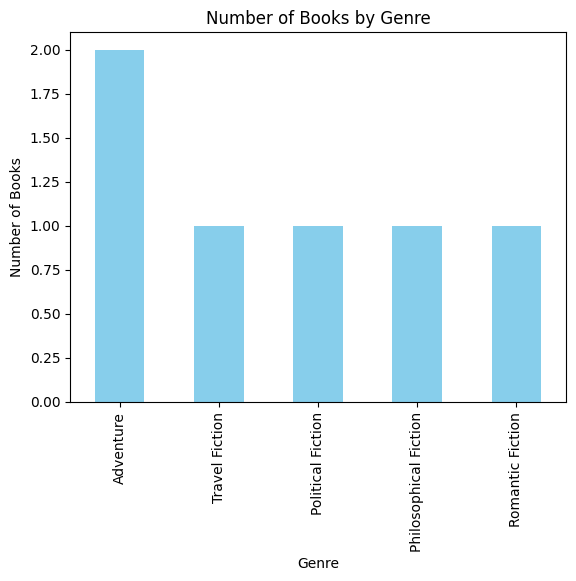


--- Advanced Features ---
1. Add Book with Validation
2. Check Book ID Validity
3. Display Genre Bar Chart
4. Display Availability Pie Chart
5. Exit
Enter your choice: 4


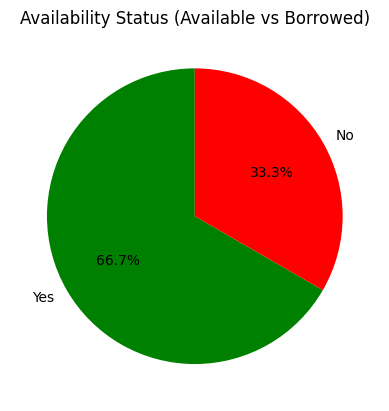


--- Advanced Features ---
1. Add Book with Validation
2. Check Book ID Validity
3. Display Genre Bar Chart
4. Display Availability Pie Chart
5. Exit
Enter your choice: 5
Exiting Advanced Features.


In [6]:
#Task 5: Advanced Features
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the data
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

def validate_book_id(book_id):
    """Validate book ID format (e.g., BK-001)."""
    if re.match(r"^BK-\d{3}$", book_id):
        return True
    return False

def add_book_with_validation():
    """Add a new book with validated book ID."""
    global df
    book_id = input("Enter Book ID (format BK-001): ").strip()
    if not validate_book_id(book_id):
        print("Invalid Book ID format. Please use format BK-001.")
        return

    try:
        if book_id in df["Book ID"].values:
            print("Book ID already exists. Please enter a unique ID.")
            return
    except KeyError:
        pass  # Handle missing 'Book ID' column gracefully

    title = input("Enter Book Title: ")
    author = input("Enter Author Name: ")
    genre = input("Enter Genre: ")
    availability = input("Is the book available? (Yes/No): ")
    borrower = input("Enter Borrower (or leave empty): ")
    borrower = borrower if borrower else None

    new_book = {
        "Book ID": book_id,
        "Title": title,
        "Author": author,
        "Genre": genre,
        "Availability": availability,
        "Borrower": borrower
    }
    df = pd.concat([df, pd.DataFrame([new_book])], ignore_index=True)
    print(f"Book '{title}' has been added to the inventory.")
    save_to_csv()

def handle_invalid_book_id(book_id):
    """Gracefully handle invalid or missing book IDs."""
    try:
        if book_id not in df["Book ID"].values:
            print(f"No book found with ID {book_id}. Please try again.")
            return False
        return True
    except KeyError:
        print("Book ID column is missing in the data.")
        return False

def save_to_csv():
    """Save the DataFrame back to the CSV file."""
    df.to_csv(csv_file, index=False)
    print("Changes have been saved to the CSV file.")

def display_genre_chart():
    """Display a bar chart of the number of books in each genre."""
    genre_counts = df["Genre"].value_counts()
    genre_counts.plot(kind="bar", color="skyblue", title="Number of Books by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Number of Books")
    plt.show()

def display_availability_pie_chart():
    """Display a pie chart of book availability."""
    availability_counts = df["Availability"].value_counts()
    availability_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["green", "red"])
    plt.title("Availability Status (Available vs Borrowed)")
    plt.ylabel("")  # Hide y-axis label
    plt.show()

# Menu for testing the functionality
while True:
    print("\n--- Advanced Features ---")
    print("1. Add Book with Validation")
    print("2. Check Book ID Validity")
    print("3. Display Genre Bar Chart")
    print("4. Display Availability Pie Chart")
    print("5. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        add_book_with_validation()
    elif choice == 2:
        book_id = input("Enter Book ID to validate: ")
        if validate_book_id(book_id):
            print("Valid Book ID.")
        else:
            print("Invalid Book ID format.")
    elif choice == 3:
        display_genre_chart()
    elif choice == 4:
        display_availability_pie_chart()
    elif choice == 5:
        print("Exiting Advanced Features.")
        break
    else:
        print("Invalid choice. Please try again.")

In [7]:
#Task 6: Statistics Using NumPy
import pandas as pd
import numpy as np

# Load the data
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

def total_books():
    """Calculate the total number of books in the library."""
    total = np.size(df["Book ID"])
    print(f"Total number of books in the library: {total}")

def most_borrowed_genre():
    """Identify the most borrowed genre."""
    borrowed_books = df[df["Borrower"].notnull()]
    genre_counts = borrowed_books["Genre"].value_counts()
    if not genre_counts.empty:
        most_borrowed = genre_counts.idxmax()
        print(f"The most borrowed genre is: {most_borrowed}")
    else:
        print("No books have been borrowed yet.")

def average_borrowing_duration():
    """
    Analyze borrowing trends (average borrowing duration).
    Assuming the dataset has a column 'Borrowing Duration' in days.
    """
    if "Borrowing Duration" in df.columns:
        durations = df["Borrowing Duration"].dropna().values
        avg_duration = np.mean(durations)
        print(f"The average borrowing duration is: {avg_duration:.2f} days")
    else:
        print("The dataset does not include borrowing duration data.")

# Menu for testing the functionality
while True:
    print("\n--- Library Statistics Using NumPy ---")
    print("1. Total Number of Books")
    print("2. Most Borrowed Genre")
    print("3. Average Borrowing Duration")
    print("4. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        total_books()
    elif choice == 2:
        most_borrowed_genre()
    elif choice == 3:
        average_borrowing_duration()
    elif choice == 4:
        print("Exiting Library Statistics System.")
        break
    else:
        print("Invalid choice. Please try again.")


--- Library Statistics Using NumPy ---
1. Total Number of Books
2. Most Borrowed Genre
3. Average Borrowing Duration
4. Exit
Enter your choice: 1
Total number of books in the library: 6

--- Library Statistics Using NumPy ---
1. Total Number of Books
2. Most Borrowed Genre
3. Average Borrowing Duration
4. Exit
Enter your choice: 2
The most borrowed genre is: Adventure

--- Library Statistics Using NumPy ---
1. Total Number of Books
2. Most Borrowed Genre
3. Average Borrowing Duration
4. Exit
Enter your choice: 3
The dataset does not include borrowing duration data.

--- Library Statistics Using NumPy ---
1. Total Number of Books
2. Most Borrowed Genre
3. Average Borrowing Duration
4. Exit
Enter your choice: 4
Exiting Library Statistics System.



--- Library Management System ---
1. View All Books
2. Add, Remove, or Update a Book
3. Borrow or Return a Book
4. Search for a Book
5. View Statistics and Visualizations
6. Exit
Enter your choice: 1

--- All Books in the Library ---
  Book ID                Title                        Author  \
0       1        Chander Pahar  Bibhutibhushan Bandyopadhyay   
1       2  Hajar Churashir Maa                Mahasweta Devi   
2       3     Kakababu Samagra            Sunil Gangopadhyay   
3       4       Shesher Kobita           Rabindranath Tagore   
4       5         Kapalkundala  Bankim Chandra Chattopadhyay   
5  BK-001     Kakababu Samagra            Sunil Gangopadhyay   

                   Genre Availability   Borrower  
0         Travel Fiction          Yes     Nandan  
1      Political Fiction           No      Supto  
2              Adventure           No  Muntahrin  
3  Philosophical Fiction          Yes        NaN  
4       Romantic Fiction          Yes    Shishir  
5         

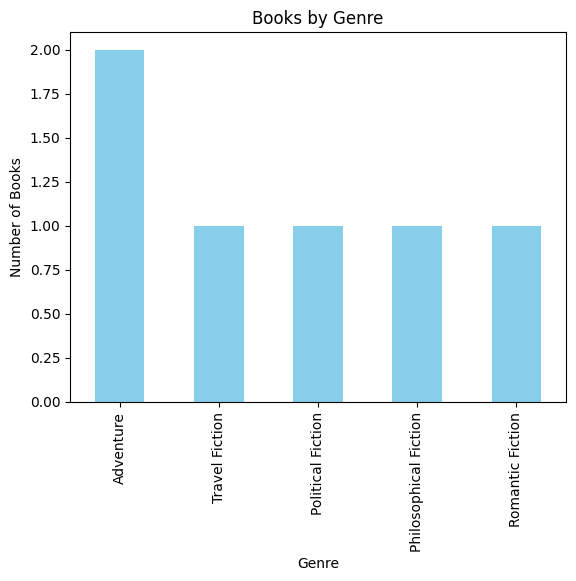

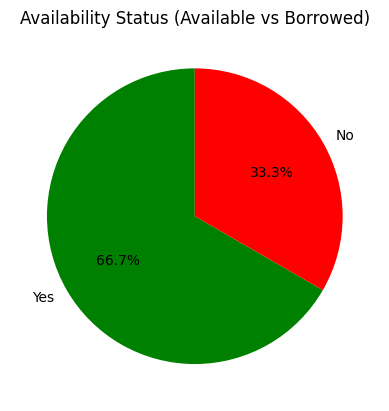


--- Library Management System ---
1. View All Books
2. Add, Remove, or Update a Book
3. Borrow or Return a Book
4. Search for a Book
5. View Statistics and Visualizations
6. Exit
Enter your choice: 6
Exiting Library Management System.


In [8]:
#Task 7: Interactive Console Interface
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Load the data
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

# Function to view all books
def view_books():
    """Display all books in the library."""
    print("\n--- All Books in the Library ---")
    print(df)

# Function to validate book ID format
def validate_book_id(book_id):
    """Validate book ID format (e.g., BK-001)."""
    return bool(re.match(r"^BK-\d{3}$", book_id))

# Function to add a book
def add_book():
    """Add a new book to the library."""
    book_id = input("Enter Book ID (format BK-001): ").strip()
    if not validate_book_id(book_id):
        print("Invalid Book ID format. Please use format BK-001.")
        return

    if book_id in df["Book ID"].values:
        print("Book ID already exists. Please enter a unique ID.")
        return

    title = input("Enter Book Title: ")
    author = input("Enter Author Name: ")
    genre = input("Enter Genre: ")
    availability = input("Is the book available? (Yes/No): ")
    borrower = input("Enter Borrower (or leave empty): ")
    borrower = borrower if borrower else None

    new_book = {
        "Book ID": book_id,
        "Title": title,
        "Author": author,
        "Genre": genre,
        "Availability": availability,
        "Borrower": borrower
    }
    df = pd.concat([df, pd.DataFrame([new_book])], ignore_index=True)
    print(f"Book '{title}' has been added to the library.")
    save_to_csv()

# Function to remove a book
def remove_book():
    """Remove a book by its ID."""
    book_id = input("Enter Book ID to remove: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    df.drop(df[df["Book ID"] == book_id].index, inplace=True)
    print(f"Book with ID {book_id} has been removed.")
    save_to_csv()

# Function to update book details
def update_book():
    """Update a book's details."""
    book_id = input("Enter Book ID to update: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    # Get new details for the book
    availability = input("Enter new Availability (Yes/No): ")
    borrower = input("Enter new Borrower (or leave empty): ")
    borrower = borrower if borrower else None

    df.loc[df["Book ID"] == book_id, "Availability"] = availability
    df.loc[df["Book ID"] == book_id, "Borrower"] = borrower
    print(f"Book with ID {book_id} has been updated.")
    save_to_csv()

# Function to borrow a book
def borrow_book():
    """Allow a user to borrow a book."""
    book_id = input("Enter Book ID to borrow: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    if df.loc[df["Book ID"] == book_id, "Availability"].values[0] == "No":
        print(f"Book with ID {book_id} is already borrowed.")
        return

    borrower = input("Enter your name: ").strip()
    df.loc[df["Book ID"] == book_id, "Availability"] = "No"
    df.loc[df["Book ID"] == book_id, "Borrower"] = borrower
    print(f"Book with ID {book_id} has been borrowed by {borrower}.")
    save_to_csv()

# Function to return a book
def return_book():
    """Allow a user to return a borrowed book."""
    book_id = input("Enter Book ID to return: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    if df.loc[df["Book ID"] == book_id, "Availability"].values[0] == "Yes":
        print(f"Book with ID {book_id} is not borrowed.")
        return

    df.loc[df["Book ID"] == book_id, "Availability"] = "Yes"
    df.loc[df["Book ID"] == book_id, "Borrower"] = None
    print(f"Book with ID {book_id} has been returned.")
    save_to_csv()

# Function to search for a book
def search_books():
    """Search for books by title, author, or genre."""
    print("\nSearch by:")
    print("1. Title")
    print("2. Author")
    print("3. Genre")
    choice = int(input("Enter your choice: "))

    query = input("Enter your search term: ").strip().lower()

    if choice == 1:
        results = df[df["Title"].str.lower().str.contains(query, na=False)]
    elif choice == 2:
        results = df[df["Author"].str.lower().str.contains(query, na=False)]
    elif choice == 3:
        results = df[df["Genre"].str.lower().str.contains(query, na=False)]
    else:
        print("Invalid choice. Returning to menu.")
        return

    if not results.empty:
        print("\nSearch Results:")
        print(results)
    else:
        print("No books found matching your search.")

# Function to save DataFrame to CSV
def save_to_csv():
    """Save the DataFrame back to the CSV file."""
    df.to_csv(csv_file, index=False)

# Function to display statistics (book counts, most borrowed genre, etc.)
def show_statistics():
    """Show library statistics."""
    print("\n--- Library Statistics ---")
    total_books = len(df)
    print(f"Total number of books: {total_books}")

    # Most borrowed genre
    borrowed_books = df[df["Availability"] == "No"]
    if not borrowed_books.empty:
        most_borrowed_genre = borrowed_books["Genre"].value_counts().idxmax()
        print(f"Most borrowed genre: {most_borrowed_genre}")
    else:
        print("No books are currently borrowed.")

    # Visualization of genre distribution
    genre_counts = df["Genre"].value_counts()
    genre_counts.plot(kind="bar", color="skyblue", title="Books by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Number of Books")
    plt.show()

    # Availability status pie chart
    availability_counts = df["Availability"].value_counts()
    availability_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["green", "red"])
    plt.title("Availability Status (Available vs Borrowed)")
    plt.ylabel("")  # Hide y-axis label
    plt.show()

# Main menu to interact with the system
while True:
    print("\n--- Library Management System ---")
    print("1. View All Books")
    print("2. Add, Remove, or Update a Book")
    print("3. Borrow or Return a Book")
    print("4. Search for a Book")
    print("5. View Statistics and Visualizations")
    print("6. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        view_books()
    elif choice == 2:
        print("\nAdd, Remove, or Update Book:")
        print("1. Add Book")
        print("2. Remove Book")
        print("3. Update Book")
        sub_choice = int(input("Enter your choice: "))
        if sub_choice == 1:
            add_book()
        elif sub_choice == 2:
            remove_book()
        elif sub_choice == 3:
            update_book()
        else:
            print("Invalid choice.")
    elif choice == 3:
        print("\nBorrow or Return Book:")
        print("1. Borrow Book")
        print("2. Return Book")
        sub_choice = int(input("Enter your choice: "))
        if sub_choice == 1:
            borrow_book()
        elif sub_choice == 2:
            return_book()
        else:
            print("Invalid choice.")
    elif choice == 4:
        search_books()
    elif choice == 5:
        show_statistics()
    elif choice == 6:
        print("Exiting Library Management System.")
        break
    else:
        print("Invalid choice. Please try again.")

In [10]:
#Task 8: File Handling
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Load the data from the CSV file
csv_file = "library_data.csv"
df = pd.read_csv(csv_file)

# Function to save DataFrame to the CSV file
def save_to_csv():
    """Save the DataFrame back to the CSV file after any update."""
    df.to_csv(csv_file, index=False)
    print("Changes have been saved to the CSV file.")

# Function to export filtered or searched data to a new CSV file
def export_to_csv(filtered_data, filename="filtered_books.csv"):
    """Export filtered or searched data to a new CSV file."""
    filtered_data.to_csv(filename, index=False)
    print(f"Filtered data has been exported to {filename}.")

# Function to view all books
def view_books():
    """Display all books in the library."""
    print("\n--- All Books in the Library ---")
    print(df)

# Function to validate book ID format
def validate_book_id(book_id):
    """Validate book ID format (e.g., BK-001)."""
    return bool(re.match(r"^BK-\d{3}$", book_id))

# Function to add a book
def add_book():
    """Add a new book to the library."""
    book_id = input("Enter Book ID (format BK-001): ").strip()
    if not validate_book_id(book_id):
        print("Invalid Book ID format. Please use format BK-001.")
        return

    if book_id in df["Book ID"].values:
        print("Book ID already exists. Please enter a unique ID.")
        return

    title = input("Enter Book Title: ")
    author = input("Enter Author Name: ")
    genre = input("Enter Genre: ")
    availability = input("Is the book available? (Yes/No): ")
    borrower = input("Enter Borrower (or leave empty): ")
    borrower = borrower if borrower else None

    new_book = {
        "Book ID": book_id,
        "Title": title,
        "Author": author,
        "Genre": genre,
        "Availability": availability,
        "Borrower": borrower
    }
    df = pd.concat([df, pd.DataFrame([new_book])], ignore_index=True)
    print(f"Book '{title}' has been added to the library.")
    save_to_csv()

# Function to remove a book
def remove_book():
    """Remove a book by its ID."""
    book_id = input("Enter Book ID to remove: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    df.drop(df[df["Book ID"] == book_id].index, inplace=True)
    print(f"Book with ID {book_id} has been removed.")
    save_to_csv()

# Function to update book details
def update_book():
    """Update a book's details."""
    book_id = input("Enter Book ID to update: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    # Get new details for the book
    availability = input("Enter new Availability (Yes/No): ")
    borrower = input("Enter new Borrower (or leave empty): ")
    borrower = borrower if borrower else None

    df.loc[df["Book ID"] == book_id, "Availability"] = availability
    df.loc[df["Book ID"] == book_id, "Borrower"] = borrower
    print(f"Book with ID {book_id} has been updated.")
    save_to_csv()

# Function to borrow a book
def borrow_book():
    """Allow a user to borrow a book."""
    book_id = input("Enter Book ID to borrow: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    if df.loc[df["Book ID"] == book_id, "Availability"].values[0] == "No":
        print(f"Book with ID {book_id} is already borrowed.")
        return

    borrower = input("Enter your name: ").strip()
    df.loc[df["Book ID"] == book_id, "Availability"] = "No"
    df.loc[df["Book ID"] == book_id, "Borrower"] = borrower
    print(f"Book with ID {book_id} has been borrowed by {borrower}.")
    save_to_csv()

# Function to return a book
def return_book():
    """Allow a user to return a borrowed book."""
    book_id = input("Enter Book ID to return: ").strip()
    if book_id not in df["Book ID"].values:
        print(f"No book found with ID {book_id}. Please try again.")
        return

    if df.loc[df["Book ID"] == book_id, "Availability"].values[0] == "Yes":
        print(f"Book with ID {book_id} is not borrowed.")
        return

    df.loc[df["Book ID"] == book_id, "Availability"] = "Yes"
    df.loc[df["Book ID"] == book_id, "Borrower"] = None
    print(f"Book with ID {book_id} has been returned.")
    save_to_csv()

# Function to search for a book
def search_books():
    """Search for books by title, author, or genre."""
    print("\nSearch by:")
    print("1. Title")
    print("2. Author")
    print("3. Genre")
    choice = int(input("Enter your choice: "))

    query = input("Enter your search term: ").strip().lower()

    if choice == 1:
        results = df[df["Title"].str.lower().str.contains(query, na=False)]
    elif choice == 2:
        results = df[df["Author"].str.lower().str.contains(query, na=False)]
    elif choice == 3:
        results = df[df["Genre"].str.lower().str.contains(query, na=False)]
    else:
        print("Invalid choice. Returning to menu.")
        return

    if not results.empty:
        print("\nSearch Results:")
        print(results)
        # Ask if the user wants to export the search results to CSV
        export_choice = input("Would you like to export these results to a CSV file? (Yes/No): ").strip().lower()
        if export_choice == "yes":
            filename = input("Enter the filename (e.g., search_results.csv): ").strip()
            export_to_csv(results, filename)
    else:
        print("No books found matching your search.")

# Main menu to interact with the system
while True:
    print("\n--- Library Management System ---")
    print("1. View All Books")
    print("2. Add, Remove, or Update a Book")
    print("3. Borrow or Return a Book")
    print("4. Search for a Book")
    print("5. Export Filtered or Searched Data to CSV")
    print("6. Exit")

    choice = int(input("Enter your choice: "))
    if choice == 1:
        view_books()
    elif choice == 2:
        print("\nAdd, Remove, or Update Book:")
        print("1. Add Book")
        print("2. Remove Book")
        print("3. Update Book")
        sub_choice = int(input("Enter your choice: "))
        if sub_choice == 1:
            add_book()
        elif sub_choice == 2:
            remove_book()
        elif sub_choice == 3:
            update_book()
        else:
            print("Invalid choice.")
    elif choice == 3:
        print("\nBorrow or Return Book:")
        print("1. Borrow Book")
        print("2. Return Book")
        sub_choice = int(input("Enter your choice: "))
        if sub_choice == 1:
            borrow_book()
        elif sub_choice == 2:
            return_book()
        else:
            print("Invalid choice.")
    elif choice == 4:
        search_books()
    elif choice == 5:
        print("This option will be handled under Search for a Book. Returning to menu.")
    elif choice == 6:
        print("Exiting Library Management System.")
        break
    else:
        print("Invalid choice. Please try again.")


--- Library Management System ---
1. View All Books
2. Add, Remove, or Update a Book
3. Borrow or Return a Book
4. Search for a Book
5. Export Filtered or Searched Data to CSV
6. Exit
Enter your choice: 1

--- All Books in the Library ---
  Book ID                Title                        Author  \
0       1        Chander Pahar  Bibhutibhushan Bandyopadhyay   
1       2  Hajar Churashir Maa                Mahasweta Devi   
2       3     Kakababu Samagra            Sunil Gangopadhyay   
3       4       Shesher Kobita           Rabindranath Tagore   
4       5         Kapalkundala  Bankim Chandra Chattopadhyay   
5  BK-001     Kakababu Samagra            Sunil Gangopadhyay   

                   Genre Availability   Borrower  
0         Travel Fiction          Yes     Nandan  
1      Political Fiction           No      Supto  
2              Adventure           No  Muntahrin  
3  Philosophical Fiction          Yes        NaN  
4       Romantic Fiction          Yes    Shishir  
5    